<a href="https://colab.research.google.com/github/radhikark0707/my-data-analysis/blob/main/UnsupervisedLearning_Wholesalecustomers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [8]:
x=data.drop(['Channel','Region'],axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [10]:
sse=[]
from sklearn.cluster import KMeans
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
  kmeans.fit(x_scaled)
  sse.append(kmeans.inertia_)

In [11]:
import matplotlib.pyplot as plt

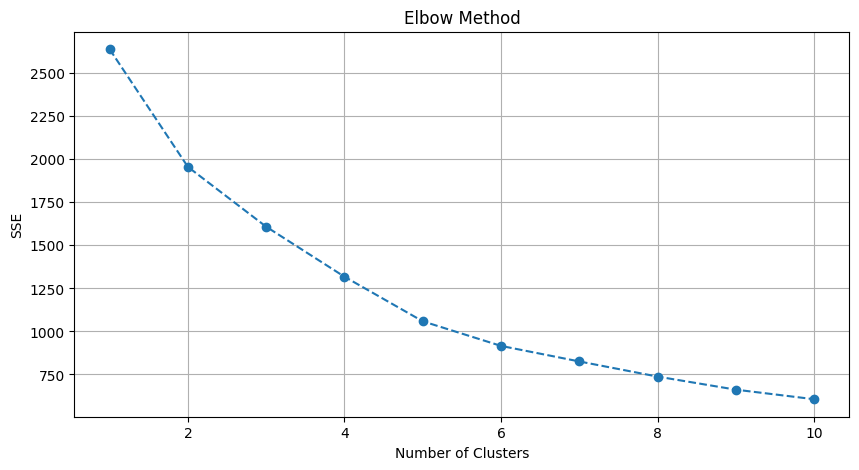

In [12]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),sse,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [13]:
kmeans=KMeans(n_clusters=6,n_init=10,random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [14]:
cluster_labels=kmeans.predict(x_scaled)

In [15]:
data['cluster_labels']=cluster_labels

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

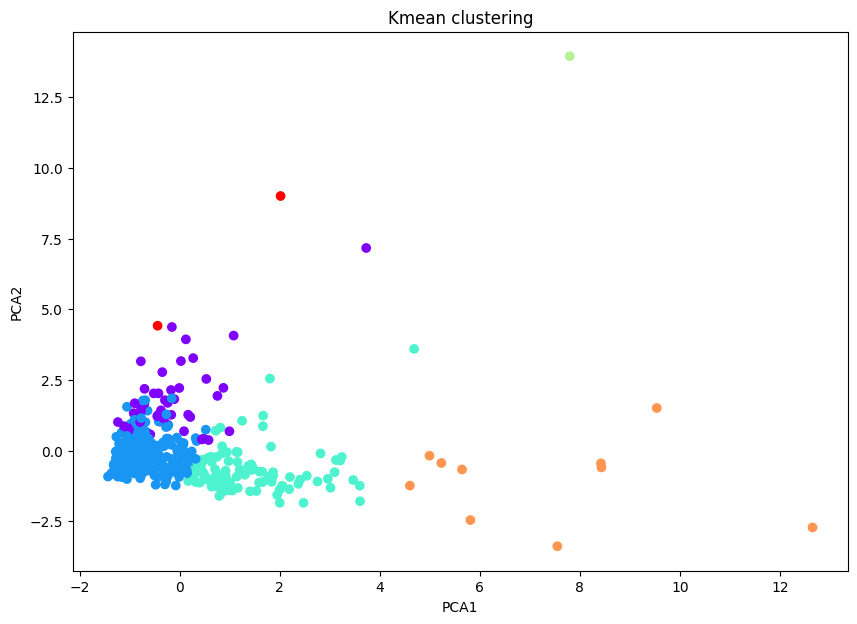

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['cluster_labels'],cmap='rainbow')
plt.title('Kmean clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x_scaled,cluster_labels)
print('Silhouette Score:',sil_avg)

Silhouette Score: 0.3782288965882046


In [20]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [21]:
mergings=linkage(x_scaled,method='ward')

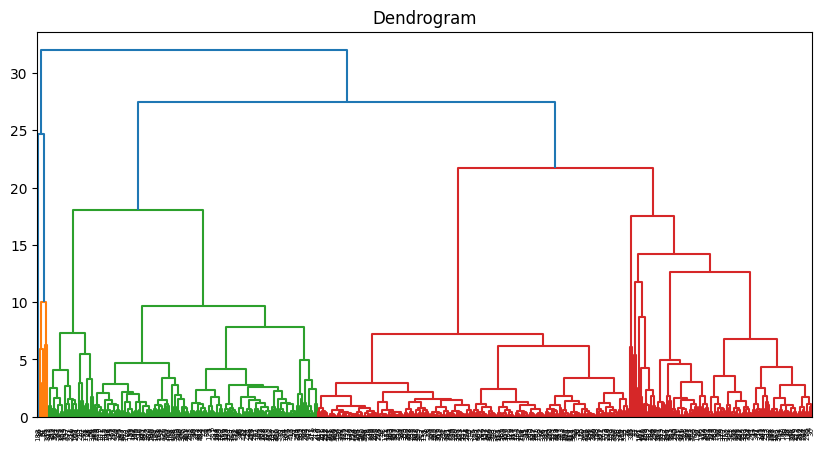

In [22]:
plt.figure(figsize=(10,5))
dendrogram(mergings)
plt.title('Dendrogram')
plt.show()

In [23]:
threshold=20
cluster_labels=fcluster(mergings,threshold,criterion='distance')

In [24]:
num_clusters=max(cluster_labels)
cmap=plt.get_cmap('tab10')

In [25]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

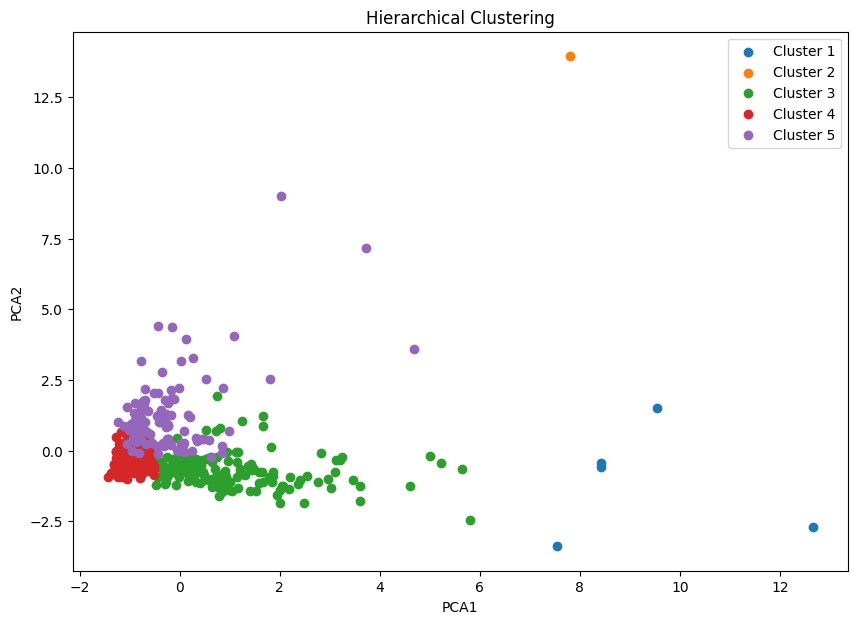

In [26]:
plt.figure(figsize=(10,7))
for i in range(1,num_clusters+1):
  cluster_data=x_pca[cluster_labels==i]
  plt.scatter(cluster_data[:,0],cluster_data[:,1],color=cmap(i-1),label=f'Cluster {i}')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [27]:
sil_avg=silhouette_score(x_scaled,cluster_labels)
print('Silhouette Score:',sil_avg)

Silhouette Score: 0.23988371669170097
